[*********************100%%**********************]  1 of 1 completed


                   SPY       Date
Date                             
2023-01-19  382.821655 2023-01-19
2023-01-20  389.953247 2023-01-20
2023-01-23  394.632111 2023-01-23
2023-01-24  394.208588 2023-01-24
2023-01-25  394.356323 2023-01-25
                   SPY       Date
Date                             
2024-01-11  476.350006 2024-01-11
2024-01-12  476.679993 2024-01-12
2024-01-16  474.929993 2024-01-16
2024-01-17  472.290009 2024-01-17
2024-01-18  476.489990 2024-01-18
            SPY_daily_percent_change
Date                                
2023-01-19                  0.018629
2023-01-20                  0.011999
2023-01-23                 -0.001073
2023-01-24                  0.000375
2023-01-25                  0.010990
...                              ...
2024-01-10                 -0.000441
2024-01-11                  0.000693
2024-01-12                 -0.003671
2024-01-16                 -0.005559
2024-01-17                  0.008893

[250 rows x 1 columns]
Value at Risk (VaR)

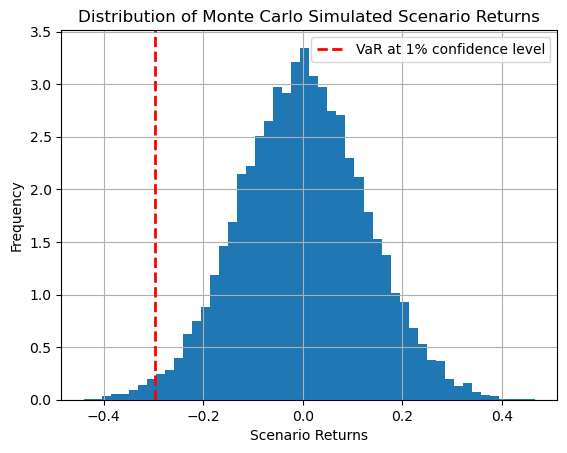

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

#Create a function to return a dataframe for daily adjusted closing prices
def pull_prices(company_tickers): 
    price_data= pd.DataFrame() 
    ticker_list= list()
    
    for i in company_tickers:
        price_data= pd.concat([price_data, 
                                pd.DataFrame(
                                    yf.download(i, start=datetime(2023, 1, 19), 
                                                   end=datetime(2024, 1, 19)
                                               ).iloc[:,4]
                                            )
                               ], axis = 1
                              )
        ticker_list.append(i)        

    price_data.columns= ticker_list 
    price_data['Date']= price_data.index 
    return price_data
    

tickers= ["SPY"]
df= pull_prices(tickers)

#Check data range
print(df.head())
print(df.tail())

# Transformation to compute daily percent change for each stock
df_percent_change = pd.DataFrame()
for column in df.columns[:-1]:  # Exclude the 'Date' column
    df_percent_change[column + '_daily_percent_change'] = (df[column].shift(-1) - df[column]) / df[column]

# Drop the last row which will contain NaN values
df_percent_change = df_percent_change.iloc[:-1]

print(df_percent_change)



# Covariance Matrix
cv_matrix = df_percent_change.cov()


# Number of simulations
simulations = 10000

# Monte Carlo Simulation
scenarioReturns = []
for _ in range(simulations):
    z_scores = np.random.normal(0, 1, len(df_percent_change.columns))
    scenario_return = np.sum(z_scores * np.sqrt(np.diag(cv_matrix))) * np.sqrt(250)  
    scenarioReturns.append(scenario_return)

# VaR Calculation
confidence_level = 0.99
VaR = np.percentile(scenarioReturns, 100 * (1 - confidence_level))

print(f"Value at Risk (VaR) at 99% confidence level: {VaR * 100:.4f} percent")



plt.hist(scenarioReturns, bins=50, density=True)
plt.xlabel('Scenario Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Monte Carlo Simulated Scenario Returns')
plt.axvline(x=VaR, color='red', linestyle='dashed', linewidth=2, label=f'VaR at 1% confidence level')
plt.legend()
plt.grid(True)
plt.show()

